This is to run performance metric (Accuracy) from the final model file.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# for Tina machine only, to import .py from src/ds/
import os
current_workpath = os.getcwd()
print("Current workpath:", current_workpath)

parent_folder = os.path.dirname(current_workpath)
print("Parent_folder:", parent_folder)

import sys
sys.path.append(parent_folder+'/src')
print(sys.path[-1])

Current workpath: /home/dev/notebooks
Parent_folder: /home/dev
/home/dev/src


In [3]:
rawfile_name = 'beer_reviews'
rawfile_format = '.csv'
rawfile_path = "../data/raw/"

interim_folder_path = "../data/interim/"
processed_folder_path  ="../data/processed/"
external_folder_path  ="../data/external/"
model_folder_path = "../models/"

# Create the split datasets

In [4]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

2023-07-12 13:22:30.042084: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-12 13:22:30.083288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
datasets = joblib.load("../data/processed/datasetsjmone")

# Preprocess the data

In [14]:
drops = [
    "review_overall",
    "beer_name",
]
for data in datasets:
    if isinstance(data, pd.DataFrame):
        for column in drops:
            if column in data.columns:
                data.drop(columns=column, inplace=True)

In [15]:
x_train, y_train, x_test, y_test, x_validation, y_validation = datasets

In [17]:
x_train = x_train.fillna(-9)
x_test = x_test.fillna(-9)

In [21]:
df_train = x_train
y_train = y_train
y_train_vocab = sorted(set(y_train))

In [22]:
df_test = x_test
y_test = y_test
y_test_vocab = sorted(set(y_test))

In [ ]:
target_lookup_train = tf.keras.layers.StringLookup(vocabulary=y_train_vocab, output_mode='one_hot')

In [ ]:
target_lookup_test = tf.keras.layers.StringLookup(vocabulary=y_test_vocab, output_mode='one_hot')

# load the model

In [5]:
# Load the Keras model
final_model = tf.keras.models.load_model(model_folder_path+'goodmod_13/')

# Access the model's summary
final_model.summary()


2023-07-12 13:22:32.428227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (34)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 beer_abv (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 brewery_name (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 review_appearance (InputLayer)  [(None,)]           0           []                               
                                                                                                  
 review_aroma (InputLayer)      [(None,)]            0           []                               
                                                                                            

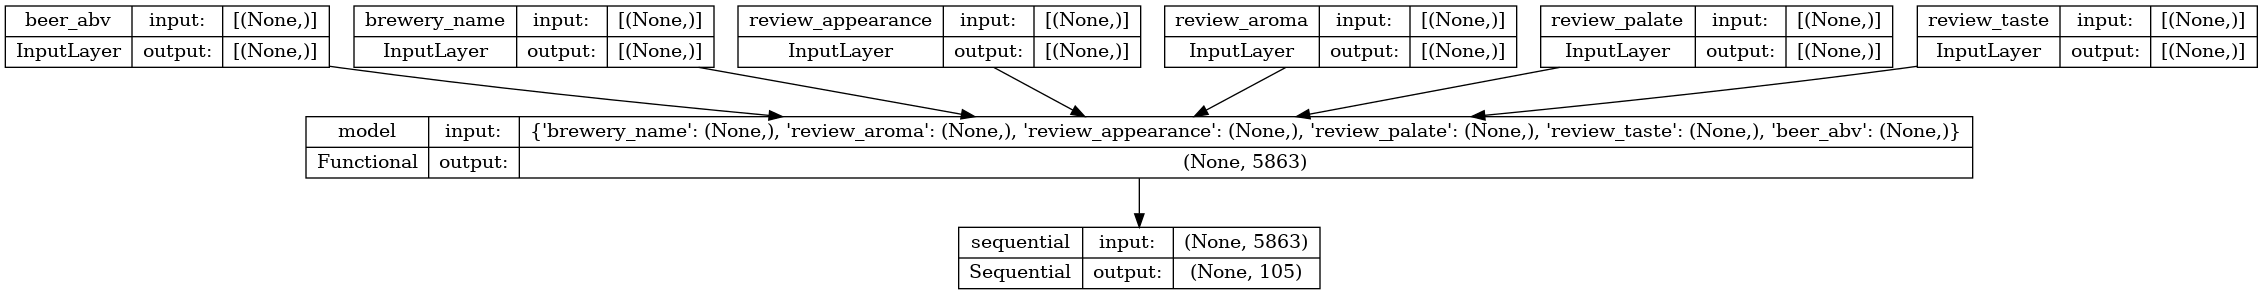

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(final_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# On Train Set

In [24]:
y_train_v3_pred_probs = final_model.predict(dict(df_train))

   11/42549 [..............................] - ETA: 8:36  

2023-07-12 11:22:22.955341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


42549/42549 [==============================] - 953s 22ms/step


In [42]:
pred_decode_train= tf.keras.layers.StringLookup(vocabulary=y_train_vocab , invert=True)
pred_train_ = tf.argmax(y_train_v3_pred_probs, axis=-1)
pred_train = pred_decode_train(pred_train_)
pred_train__ = np.array([x.decode('utf-8') for x in pred_train.numpy()])

In [59]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

# Convert tensors to numpy arrays
y_train_arr = np.array(y_train)
pred_train_arr = pred_train__

# Convert y_train and pred_train to binary arrays
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train_arr)
pred_train_bin = mlb.transform(pred_train_arr)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train_bin, pred_train_bin)
print("Training accuracy:", train_accuracy)


Training accuracy: 0.8357455315698555


# On Test Set

In [66]:
y_test_v3_pred_probs = final_model.predict(dict(df_test))

5319/5319 [==============================] - 27s 5ms/step


In [67]:
pred_decode_test= tf.keras.layers.StringLookup(vocabulary=y_test_vocab , invert=True)
pred_test_ = tf.argmax(y_test_v3_pred_probs, axis=-1)
pred_test = pred_decode_test(pred_test_)
pred_test__ = np.array([x.decode('utf-8') for x in pred_test.numpy()])

In [68]:
y_test_arr = np.array(y_test)
pred_test_arr = pred_test__

mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test_arr)
pred_test_bin = mlb.transform(pred_test_arr)


test_accuracy = accuracy_score(y_test_bin, pred_test_bin)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.785732752035912
